# Datenanalyse Teil 2

Willkommen zurück! Hier geht es nahtlos weiter mit der Datenanalyse mithilfe von Python und konkret mit pandas. Wir schauen uns erst an, wie wir DataFrames filtern sowie Werte darin bearbeiten können. Anschließend widmen wir uns dem Anwendungsfall und visualisieren eine Wortverlaufskurve.

Bevor wir mit den Daten aus dem ersten Teil des Notebook weiterarbeiten können, müssen wir diese nochmals in den Arbeitsspeicher laden. Führ dazu folgende Code-Zelle aus, die den relevanten Code des ersten Teils wiederholt.

In [1]:
import pandas as pd

#Datei in Arbeitsspeicher laden
with open("../3_Dateien/Songkorpus/songkorpus_token.tsv") as f:
    songkorpus = pd.read_csv(f, sep="\t")

#Umbenennen der Spalten
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]

#Anfügen einer Spalte für das Jahrzehnt (hier mittels List Comprehension)
songkorpus["Jahrzehnt"] = [str(year)[:-1] + "0" for year in songkorpus["Jahr"]]

#Anfügen einer Spalte für die Länge der Tokens (hier mittels List Comprehension)
songkorpus["Länge"] = [len(str(token)) for token in songkorpus["Token"]]

## DataFrame filtern 

Zunächst wollen wir herausfinden, wie wir ein DataFrame filtern können. Die grundlegende Syntax sieht wie folgt aus:

```DataFrame[filter]```

```filter``` wiederum kann unterschiedlich ausschauen, je nach dem, wie wir unser DataFrame filtern wollen. Ein einfaches Beispiel für ```filter``` sieht so aus:

```DataFrame[column] == value```

Dieser Filter verlangt, dass bei ```DataFrame``` in der Spalte ```column``` exakt der Wert ```value``` steht.

Fügen wir diesen Filter in der obigen Syntax ein und schaffen ein Sub-DataFrame, das alle Zeilen des ```songkorpus``` beinhaltet, in denen in der Spalte ```Token``` das Wort "Liebe" steht:

In [2]:
liebe = songkorpus[songkorpus["Token"] == "Liebe"]
liebe.head(5)

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
100396,Liebe,1969,1,1960,5
100397,Liebe,1970,93,1970,5
100398,Liebe,1971,106,1970,5
100399,Liebe,1972,104,1970,5
100400,Liebe,1973,152,1970,5


Das klappt wunderbar. Spiel gerne mit anderen Begriffen herum.

***

✏️ **Übung 1:** Erstell ein Sub-DataFrame, das nur Tokens beinhaltet, die mindestens 20 Zeichen lang sind.

In [3]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

Abgesehen von Vergleichsoperatoren (```==```, ```!=```, ```>```, ```<```, ```>=``` und ```<=```, vgl. Notebook "Einführung") bei numerischen Werten (alle Operatoren) bzw. strings (nur die ersten beiden) können wir bei strings auch andere Methoden in den Filter einbauen. Pandas bietet sowohl solche an, die wir bereits von gewöhnlichen strings kennen (vgl. Notebook "Funktionen und Methoden Teil 1"), als auch ein paar eigene. Wichtig ist, dass die Methoden die Boolschen Werte ```True``` oder ```False``` zurückgeben. Das heißt, ```startswith``` funktioniert, ```split``` hingegen nicht. String-Methoden bei pandas beginnen **immer** mit ```str```, gefolgt von der Methode, also etwa ```str.startswith()```. Außerdem müssen wir ihnen in einigen Fällen den Parameter ```na=False``` übergeben. Hier ein paar Beispiele:

In [4]:
liebe_startswith = songkorpus[songkorpus["Token"].str.startswith("liebe", na=False)] #Wie normale string-Methode in Python
liebe_endswith = songkorpus[songkorpus["Token"].str.endswith("liebe", na=False)] #Wie normale string-Methode in Python
liebe_contains = songkorpus[songkorpus["Token"].str.contains("liebe", na=False)] #Pandas-eigene Methode

print(len(liebe_startswith), len(liebe_endswith), len(liebe_contains))
liebe_contains

217 108 398


,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
16012,Belieben,2008,1,2000,8
19998,Bliebe,1969,1,1960,6
19999,Bliebe,1970,1,1970,6
20000,Bliebe,2011,1,2010,6
20001,Blieben,1973,3,1970,7
...,...,...,...,...,...
379600,zuliebe,2003,4,2000,7
379886,zurückgeblieben,2001,1,2000,15
379887,zurückgebliebene,2012,1,2010,16
379967,zurückzulieben,2010,1,2010,14


***

✏️ **Übung 2:** Erstell das gleiche Sub-DataFrame wie in Übung 9 (also eines, das nur Tokens beinhaltet, die mindestes 20 Zeichen lang sind), allerdings ohne dabei die Spalte "Länge" zu bemühen. Du kannst dazu eine Methode verwenden, die auch bei normalen strings funktioniert. Stell sicher, dass die Ergebnisse der beiden Übungen identisch sind.

In [5]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

Gut zu wissen: Filter können auch miteinander kombiniert werden. Dazu verwenden wir die logischen Operatoren aus dem Notebook "Kontrollstrukturen", die bei pandas allerdings in einem anderen Gewand daherkommen:

- ```&``` steht für für ```and```
- ```|``` steht für ```or``` 

Außerdem steht ```~``` steht für ```not``` und kann zur Negation eines in runde Klammern gesetzten, einzelnen Filters benutzt werden.

Unter Verwendung von ```&``` können wir beispielsweise alle (potenziellen) regelmäßigen Partizip II-Formen extrahieren:

In [6]:
songkorpus[songkorpus["Token"].str.startswith("ge", na=False) & songkorpus["Token"].str.endswith("t", na=False)]

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
249692,ge-ge-gehemmt,1995,1,1990,13
249695,geachtet,1971,1,1970,8
249696,geachtet,1973,3,1970,8
249697,geachtet,1980,1,1980,8
249698,geachtet,1984,1,1980,8
...,...,...,...,...,...
260388,geübt,2011,1,2010,5
260389,geübt,2012,2,2010,5
260390,geübt,2016,1,2010,5
260391,geübt,2018,1,2010,5


Bedenke, dass auch falsch positive Ergebnisse dabei sein könnten sowie dass falsch negative fehlen könnten (vgl. Wahrheitsmatrix aus dem Notebook "Input und Output Teil 1").

Nun wissen wir, wie wir ein DataFrame filtern können. 

## Werte zählen

Dieses Wissen können wir auch einsetzen, um spezifische Werte – im Gegensatz zu allen Werten wie bei ```value_counts``` oben – in einer Spalte auszuzählen:

In [7]:
len(songkorpus[songkorpus["Token"] == "Wunderkind"])

5

Wir filtern also das DataFrame ("alle Zeilen, in denen 'Wunderkind' in der Spalte 'Token' steht") und lassen uns ganz einfach seine Länge (sprich die Anzahl an Zeilen) ausgeben.

## Werte bearbeiten

Auch zum Bearbeiten von Werten benötigen wir nur bereits erlerntes Wissen. Grundsätzlich können wir alles von einem kompletten DataFrame, über eine Series (in Form einer Spalte oder Zeile) bis hin zu einzelnen, spezifischen Werten bearbeiten. 

Die Möglichkeiten der Bearbeitung hängen natürlich vom Datentyp der Werte ab. In unserem DataFrame haben wir einerseits strings und andererseits numerische Werte. Spalten weisen jeweils einen homogen Datentyp auf.

Die Logik ist unabhängig davon, was wir wie bearbeiten, immer die gleiche: Wir greifen auf den gewünschten Ausschnitt des DataFrame zu (s.&nbsp;o.) und überschreiben ihn mit demselben Ausschnitt in bearbeiteter Form. Anstatt sie zu überschreiben können wir die bearbeiteten Werte natürlich immer auch einer neuen Spalte oder Zeile (desgleichen oder eines neuen DataFrame) zuweisen, sofern die jeweiligen Dimensionen übereinstimmen  (s.&nbsp;o.). 

### Strings

Auf strings angewandt sieht das so aus, wenn wir etwa alle Tokens kleinschreiben wollen. Auch hier setzen wir ```str``` vor die pandas-string-Methode:

In [8]:
songkorpus["Token"] = songkorpus["Token"].str.lower()
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
0,klaround,2007,1,2000,8
1,#3,2009,1,2000,2
2,#babo,2015,1,2010,5
3,#jesuispasséchezso,2018,1,2010,18
4,#nachbar,2016,1,2010,8
...,...,...,...,...,...
386505,﻿vierzehn,2020,1,2020,9
386506,﻿was,2020,1,2020,4
386507,﻿weißer,2020,1,2020,7
386508,﻿wie,2020,1,2020,4


Diese einzeilige Syntax hat es in sich: Man kann sie sich in gewohnter Python-Logik wie eine Iteration vorstellen: Im vorliegenden Fall wird Wort für Wort (in der Spalte "Token") kleingeschrieben. Mit dem Resultat wird die Spalte überschrieben. Sie ist dennoch nicht mit einer List Comprehension, die ja auch nur eine einzige Zeile benötigt, zu verwechseln. Denn im Gegensatz zu pythonischen ```for```-Loops und ihre simplifizierte Version List Comprehension, wird der Code mit der pandas-eigenen Syntax oft **wesentlich schneller** berechnet (teils über 1000 Mal schneller!). Grund dafür ist die sog. *Vektorisierung*. Ganz einfach forumuliert wird dabei dieselbe Operation nicht auf ein Element nach dem anderen angewandt (wie bei ```for```-Loops), sondern auf mehrere gleichzeitig. Außerdem sind pandas-Operationen im Gegensatz zu nativem Python-Code (```for```-Loops) speziell auf Effizienz ausgelegt. Wenn Du Dich dafür interessierst, findest Du u.&nbsp;a. in [diesem Artikel](https://medium.com/analytics-vidhya/understanding-vectorization-in-numpy-and-pandas-188b6ebc5398) und [diesem Video](https://www.youtube.com/watch?v=nxWginnBklU) Anknüpfungspunkte. Weiter unten folgen Übungen zum Vergleich von nativem Python-Code und pandas-Code.

Zusätzlich zu den bisher verwendeten string-Methoden ```lower```, ```startswith```, ```endswith``` und ```len``` bietet pandas u.&nbsp;a. folgende an, die allesamt wie ihre nativen Python-Pendants funktionieren (vgl. Notebook "Funktionen und Methoden Teil 1"): 
- ```upper```, ```capitalize```, ```swapcase```, ```isupper``` und ```islower``` zur Bearbeitung/Überprüfung von Groß-/Kleinschreibung der strings.
- ```split``` zum Splitten der strings, optional mit dem Parameter ```expand=True```, um jedem unterteilten Element eine neue Spalte zuzuweisen.
- ```replace``` zum Ersetzen aller Vorkommen eines strings/regulären Ausdrucks (hier zusätzlich ```regex=True``` spezifizieren) mit einem anderen string.
- ```count``` zum Berechnen der Auftretenshäufigkeit eines strings/regulären Ausdrucks in den strings.
- ```strip```, ```lstrip``` und ```rstrip``` zum Entfernen von (leading/trailing) whitespace in den strings.

Neben ```contains``` (s.&nbsp;o.) ist außerdem ```slice``` eine nützliche pandas-string-Methode, die abweichend von ihrem nativen Python-Pendant heißt: ```slice``` mit den Argumenten ```start```, ```stop```, ```step``` implementiert die Funktionalität der eckigen Klammern, die wir bei normalen Python-strings zum Slicen verwenden.

[Hier](https://pandas.pydata.org/docs/user_guide/text.html) findest Du mehr Infos zu sämlichen string-Methoden bei pandas. Denk stets daran, ```str``` vor die jeweilige string-Methode zu hängen!

Zwei letzte praktische Methoden sind ```isin(list)``` und ```shift(n)```, die aber nicht string-spezifisch sind, weswegen wir **kein** ```str``` vor die Methode hängen. ```isin``` überprüft, ob ein Wert Element der übergebenen Liste ist und gibt eine Series mit Boolschen Werten zurück. ```shift``` wiederum lässt uns auf den Inhalt benachbarter Zeilen zugreifen, konkret auf den Inhalt der um ```n``` nach oben (n) bzw. nach unten (-n) *geshifteten* Zeile. Das macht ```shift``` insbesondere für die Erstellung von n-grammen interessant. Die folgende Code-Zelle demonstriert die Erstellung von Bigrammen basierend auf einer Spalte mit Tokens (Unigrammen): 

In [9]:
ngram_df = pd.DataFrame(["Ich", "gehe", "am", "Abend", "noch", "spazieren"], columns=["unigram"])
ngram_df["bigram"] = ngram_df["unigram"] + " " + ngram_df["unigram"].shift(-1)
ngram_df

,unigram,bigram
0,Ich,Ich gehe
1,gehe,gehe am
2,am,am Abend
3,Abend,Abend noch
4,noch,noch spazieren
5,spazieren,NaN


So einfach kann die Berechnung von n-grammen sein!

### Numerische Werte

Bei numerischen Werten wiederum können wir ganz einfach arithmetische Operatoren (vgl. Notebook "Einführung") verwenden, etwa um alle Werte einer Spalte zu verdoppeln:

In [10]:
#Führ diese Zeile nur einmal aus, denn mit jedem Mal verdoppeln sich die Werte.
songkorpus["Häufigkeit"] = songkorpus["Häufigkeit"] * 2
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
0,klaround,2007,2,2000,8
1,#3,2009,2,2000,2
2,#babo,2015,2,2010,5
3,#jesuispasséchezso,2018,2,2010,18
4,#nachbar,2016,2,2010,8
...,...,...,...,...,...
386505,﻿vierzehn,2020,2,2020,9
386506,﻿was,2020,2,2020,4
386507,﻿weißer,2020,2,2020,7
386508,﻿wie,2020,2,2020,4


Hierfür funktionieren auch die anderen uns bekannten arithmetischen Operatoren: ```+``` für Addition (eignet sich überdies zur Konkatenation von strings), ```-``` für Subtraktion,  ```/``` für Division und ```**``` fürs Potenzieren. 

### Datentyp ändern

Sollten Werte mal im falschen Datentyp vorliegen, kann man (sofern sinnvoll) die Methode ```astype``` verwenden, um Werte in den gewünschten Datentyp zu casten. Wenn wir z.&nbsp;B. die Häufigkeiten wieder in den Originalzustand versetzen wollen, können wir erst alle Werte in der entsprechenden Spalte halbieren...

In [11]:
songkorpus["Häufigkeit"] = songkorpus["Häufigkeit"] / 2
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
0,klaround,2007,1.0,2000,8
1,#3,2009,1.0,2000,2
2,#babo,2015,1.0,2010,5
3,#jesuispasséchezso,2018,1.0,2010,18
4,#nachbar,2016,1.0,2010,8
...,...,...,...,...,...
386505,﻿vierzehn,2020,1.0,2020,9
386506,﻿was,2020,1.0,2020,4
386507,﻿weißer,2020,1.0,2020,7
386508,﻿wie,2020,1.0,2020,4


...und, da Resultat einer Division immer Dezimalzahlen sind (s. Nachkommastelle), anschließend in Ganzzahlen casten:

In [12]:
songkorpus["Häufigkeit"] = songkorpus["Häufigkeit"].astype(int)
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
0,klaround,2007,1,2000,8
1,#3,2009,1,2000,2
2,#babo,2015,1,2010,5
3,#jesuispasséchezso,2018,1,2010,18
4,#nachbar,2016,1,2010,8
...,...,...,...,...,...
386505,﻿vierzehn,2020,1,2020,9
386506,﻿was,2020,1,2020,4
386507,﻿weißer,2020,1,2020,7
386508,﻿wie,2020,1,2020,4


***

✏️ **Übung 3:** Oben haben wir die Spalte "Jahrzehnt" basierend auf den Jahreszahlen mithilfe eines ```for```-Loops geschaffen. Geh abermals von der Spalte "Jahr" aus, um eine neue Spalte "Jahrzehnt_ohne_Loop" zu schaffen, allerdings – wie der Name verrät – ohne dafür einen Loop, auch nicht in Form einer List Comprehension, zu benutzen. Mit anderen Worten: Du sollst pandas-Syntax dafür einsetzen. Wenn Dein Code stimmt, ergibt die bereits geschriebene (derzeit auskommentierte) Zeile ```True```.

💡 Tipp: Es sind dieselben einzelnen Schritte wie im ```for```-Loop oben nötig, allerdings formuliert in pandas-Syntax. Gegebenfalls musst Du in der [pandas-Dokumentation](https://pandas.pydata.org/docs/) nachschlagen, wie die jeweilige Syntax der pandas-Pendants ausschaut. 

In [13]:
#In diese Zelle kannst Du den Code zur Übung schreiben.


#print(songkorpus["Jahrzehnt"].equals(songkorpus["Jahrzehnt_ohne_Loop"]))

***

Sehr gut! Die simple Iteration von oben, die sämtliche Werte nacheinander auf dieselbe Weise bearbeitet, können wir also auch ganz einfach in vektorisierter Form nachbilden. 

### Bedingte Bearbeitung

```for```-Loops bieten aber natürlich viel mehr Funktionalität. Etwa können wir bedingte Anweisungen einbauen, sodass die Werte je nach Bedingung unterschiedlich bearbeitet werden. Aber auch dafür bietet pandas, oder besser gesagt *numpy* (eine weitere Bibliothek, die eng mit pandas verwoben ist) eine Funktion, die sich Vektorisierung zunutze macht. Auch numpy müssen wir erst importieren (ggf. sogar noch zuerst installieren, s.&nbsp;o.), gängigerweise weisen wir der Bibliothek den Namen ```np``` zu:

In [14]:
import numpy as np

Die Funktion heißt ```where``` und hat folgende Syntax:

```where(if, then, else)```

Als erstes Argument ("if") spezifizieren wir eine bedingte Anweisung, die bei jedem Wert entweder ```True``` oder ```False``` ergibt. Im Falle von ```True``` wird der Wert wie im zweiten Argument ("then") angegeben eingetragen bzw. bearbeitet. Andernfalls greift, was wir als drittes Argument ("else") definiert haben. 

Angenommen wir möchten zusätzlich zur Spalte "Jahrzehnt" eine Spalte "Jahrhundert", können wir ```where``` folgendermaßen dazu einsetzen:

In [15]:
#Vor 'where' steht wie gewohnt der Modulname, damit Python weiß, wo sich die Funktion befindet.
songkorpus["Jahrhundert"] = np.where(songkorpus["Jahr"] < 2000, "20. Jhd.", "21. Jhd.")
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge,Jahrhundert
0,klaround,2007,1,2000,8,21. Jhd.
1,#3,2009,1,2000,2,21. Jhd.
2,#babo,2015,1,2010,5,21. Jhd.
3,#jesuispasséchezso,2018,1,2010,18,21. Jhd.
4,#nachbar,2016,1,2010,8,21. Jhd.
...,...,...,...,...,...,...
386505,﻿vierzehn,2020,1,2020,9,21. Jhd.
386506,﻿was,2020,1,2020,4,21. Jhd.
386507,﻿weißer,2020,1,2020,7,21. Jhd.
386508,﻿wie,2020,1,2020,4,21. Jhd.


Sehr gut! Bedenke, dass die Begriffe ```if``` und ```else```, die wir bei bedingten Anweisungen in normalem Python verwenden, nicht benötigt werden. Die Logik ergibt sich einzig über die Reihenfolge der Argumente in ```where```.

In diesem Fall haben wir als "then" bzw. "else" ganz einfach strings übergeben, die je nachdem in der neuen Spalte "Jahrhundert" eingetragen wurden. In der folgenden Übung wollen wir bei "then" und "else" bestimmte Werte in der jeweilige Zeile bearbeiten.

***

✏️ **Übung 4:** Bearbeite die Werte in der Spalte "Token" so, dass jedes Wort, das aus genau fünf Buchstaben besteht, großgeschrieben wird. Einfach weil wir's können! 😉

In [16]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

Super! 

Für den Fall, dass Du mehrere bedingte Anweisungen aneinanderhängen willst (```if```-```elif```-...-```else```), kannst Du statt ```where``` die numpy-Funktion ```select``` benutzen. Wir setzen sie weiter unten noch ein.

### ```apply``` und ```applymap```

Wie erwähnt ist die vektorisierte Art der Datenbearbeitung in pandas meistens äußerst effizient. Es gibt aber Fälle, in denen wir dennoch eine Funktion mit nativem Python-Code anwenden wollen. Entweder, weil pandas die benötigen Operationen nicht implementiert, oder weil es mit nativem Python-Code trotz allem effizienter ist (dazu gleich mehr).  

In jedem Fall bieten die Methoden ```apply``` und ```applymap``` die Möglichkeit, jede beliebige Funktion (und in der Verlängerung auch jede beliebige Methode) auf eine Series oder gleich ein ganzes DataFrame anzuwenden. ```apply``` verwenden wir bei einer Series, ```applymap``` bei einem ganzen DataFrame. Angehängt an die Series bzw. das DataFrame übergeben wir ihnen schlicht den Namen der gewünschten Funktion. Es spielt keine Rolle, ob die Funktion aus der Grundausstattung von Python stammt, importiert wurde oder von Dir selbst geschrieben ist.

Machen wir es konkret, und zwar in zwei kleinen Experimenten. Wir wollen die gleiche Art der Datenbearbeitung je einmal vektorisiert implementieren, und einmal über eine eigene Funktion, die wir mithilfe von ```apply``` auf die Daten *appli*zieren. Zum Verständnis: Rufen wir eine Funktion über ```apply``` (oder ```applymap```) auf, wird dieser wie bei einem ```for```-Loop *Wert für Wert* übergeben. Will heißen: Bei ```apply``` können wir nicht von der Verarbeitung mehrerer Daten auf einmal profitieren.

Für das erste Experiment rufen wir ein DataFrame ins Leben, das aus einer Million Zeilen und zwei Spalten, "A" und "B", besteht. Das DataFrame befüllen wir mit zufälligen Zahlen zwischen null und 100 (unter Verwendung der numpy-Funktion ```random.randint```). Insgesamt also ein ziemlich großes DataFrame:

In [17]:
exp1 = pd.DataFrame(np.random.randint(0,100, size=(1000000,2)), columns=["A", "B"])
exp1.head()

,A,B
0,63,91
1,6,28
2,38,83
3,38,84
4,3,33


Nun wollen wir eine dritte Spalte "C" schaffen, die ganz einfach das jeweilige Produkt der Werte in den Spalten "A" und "B" enthält. In der ersten Zelle unten tun wir dies auf vektorisierte Weise, in der zweiten mithilfe einer eigenen Funktion und ```apply```. Um zu messen, wie lange das jeweils dauert, verwenden wir das ```time```-Modul aus der Grundausstattung von Python:

In [18]:
#Vektorisiert
import time
start = time.time() #Zeit zum Startpunkt

exp1["C"] = exp1["A"] * exp1["B"]
vectorized = time.time()-start #Zeit nach Beendigung der Berechnung minus Startzeit, ergibt Dauer

exp1.head()

,A,B,C
0,63,91,5733
1,6,28,168
2,38,83,3154
3,38,84,3192
4,3,33,99


In [19]:
#For-Loop
start = time.time() #Zeit zum Startpunkt

def multiply(row):
    return row["A"]*row["B"]

#Dem Funktionsnamen (hier: 'multiply') folgen keine Klammern!
#'axis=1' spezifiziert, dass wir die Funktion auf Spalten anwenden (s. o.)
exp1["C"] = exp1.apply(multiply, axis=1) 

for_loop = time.time()-start #Zeit nach Beendigung der Berechnung minus Startzeit, ergibt Dauer
exp1.head()

,A,B,C
0,63,91,5733
1,6,28,168
2,38,83,3154
3,38,84,3192
4,3,33,99


Die effektive Berechnungsdauer hängt von verschiedenen Faktoren ab und variiert auch zwischen mehreren Durchgängen. In jedem Fall aber sollte sich ein großer Unterschied zeigen. Typischerweise ist die vektorisierte Berechnung mehrere Hundert Male schneller als die Verwendung einer eigenen Python-Funktion:

In [20]:
print("Vektorisiert:", vectorized, "\nfor-Loop", for_loop, "\nFaktor:", for_loop/vectorized)

Vektorisiert: 0.004122018814086914 
for-Loop 7.614826917648315 
Faktor: 1847.3537509399039


Sehr eindrucksvoll! 

Gehen wir zum zweiten Experiment über, indem wir wieder ein DataFrame mit einer Million Zeilen, aber nur einer Spalte, "Satz", schaffen. Diesmal befüllen wir das DataFrame mit dem immergleichen string (unter Verwendung der numpy-Funktion ```repeat```):

In [21]:
exp2 = pd.DataFrame(np.repeat("Dies ist ein nicht besonders langer Satz.", 1000000, axis=0), columns=["Satz"])
exp2.tail()

,Satz
999995,Dies ist ein nicht besonders langer Satz.
999996,Dies ist ein nicht besonders langer Satz.
999997,Dies ist ein nicht besonders langer Satz.
999998,Dies ist ein nicht besonders langer Satz.
999999,Dies ist ein nicht besonders langer Satz.


Hier wollen wir ebenfalls eine weitere Spalte schaffen. Sie soll ganz unspektakulär die Anzahl an Wörtern des jeweiligen strings in der Spalte "Satz" enthalten. In diesem konstruierten Beispiel ergibt dies selbstverständlich immer sieben. Die erste Zelle enthält wieder die vektorisierte pandas-Variante, während die zweite über ```apply``` eine selbst geschriebene Funktion mit Python-Code aufruft.

In [22]:
#Vektorisiert
start = time.time()

exp2["Länge"] = exp2["Satz"].str.split().str.len()

vectorized = time.time()-start

exp2.head()

,Satz,Länge
0,Dies ist ein nicht besonders langer Satz.,7
1,Dies ist ein nicht besonders langer Satz.,7
2,Dies ist ein nicht besonders langer Satz.,7
3,Dies ist ein nicht besonders langer Satz.,7
4,Dies ist ein nicht besonders langer Satz.,7


In [23]:
#For-Loop
start = time.time()

def split(sentence):
    return len(sentence.split())

#Dem Funktionsnamen (hier: 'split') folgen keine Klammern!
exp2["Länge"] = exp2["Satz"].apply(split)
for_loop = time.time()-start

exp2.head()

,Satz,Länge
0,Dies ist ein nicht besonders langer Satz.,7
1,Dies ist ein nicht besonders langer Satz.,7
2,Dies ist ein nicht besonders langer Satz.,7
3,Dies ist ein nicht besonders langer Satz.,7
4,Dies ist ein nicht besonders langer Satz.,7


Auch hier variieren die effektiven Berechnungszeiten mitunter stark, dennoch sollte sich zeigen, dass in diesem Fall die zweite Variante mit nativem Python-Code und ```apply``` um einiges schneller berechnet wird, selbst wenn der Faktor nicht gleich eindrucksvoll wie oben ist:

In [24]:
print("Vektorisiert:", vectorized, "\nfor-Loop", for_loop, "\nFaktor:", vectorized/for_loop)

Vektorisiert: 1.5878746509552002 
for-Loop 0.4817616939544678 
Faktor: 3.2959753149350086


Wir können festhalten, dass Vektorisierung bei Zahlen unglaublich effizient ist. Bei der Bearbeitung von strings hinken pandas-Operationen, jedenfalls bei großen Datenmengen, nativem Python-Code hinterher. Es sei denn Du hast riesige Mengen an strings zu bearbeiten, empfiehlt sich der Einsatz von pandas-Operationen der Einheitlichkeit halber i.&nbsp;d.&nbsp;R. dennoch. 

***

✏️ **Übung 5:** Caste sämtliche Werte in ```songkorpus``` in strings.

In [25]:
#In diese Zelle kannst Du den Code zur Übung schreiben.




***

## 🔧 Anwendungsfall: Wortverlaufskurven visualisieren 📈

Im Anwendungsfall für dieses Notebook wollen wir wie gesagt Wortverlaufskurven visualisieren. Das heißt, wir wollen die Häufigkeit, mit der ein beliebiges Wort auftritt, über die Zeit hinweg darstellen. Für die vier Personalpronomen "ich", "du", "er" und "sie" sieht das z.&nbsp;B. wie in der kombinierten Grafik unten aus. Die linke Darstellung visualisiert die Daten nach einzelnen Jahren (wie der originale Datensatz), in der mittleren und rechten Darstellung werden die Daten aggregiert nach Fünfjahresabschnitten bzw. Zehnjahresabschnitten visualisiert. Einzelne Aussschläge nach oben und unten werden so ausgebügelt und Trends sind leichter zu erkennen:

<img src="../3_Dateien/Grafiken_und_Videos/Wortverlaufskurve_kombiniert.png">

Deine Aufgabe ist es erst einmal, Code zu schreiben, der die linke Grafik für beliebige Wörter produziert. Die erforderliche Aggregation für die mittlere und rechte Darstellung schauen wir uns im Anschluss an den Anwendungsfall gemeinsam an. 

Wie in den Notebooks "Funktionen und Methoden Teil 2" und "Input und Output Teil 2" hast Du wieder die Wahl, den Anwendungsfall ohne weitere Anleitung in Angriff zu nehmen oder einer Schritt-für-Schritt-Anleitung zu folgen. In letzterem Fall kannst Du jetzt ans Ende der nächsten Code-Zelle springen. Wenn Du es alleine probieren möchtest, dann analysiere das gewünschte Resultat oben links und frag Dich, welche Daten wie und wo visualisiert werden. 

💡 Tipp 1: Die relativen Häufigkeiten pro Wort und Jahr liegen noch nicht in unserem DataFrame vor. Du musst sie also erst ausrechnen. Überleg Dir genau, wie Du von den existierenden, absoluten Häufigkeiten zu den relativen Häufigkeiten pro Jahr kommst. Dazu seien zwei nützliche Methoden erwähnt (klick auf ihren Namen, um zur offiziellen Dokumentation zu gelangen):
- [```groupby```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html): Nach dem Motto "split-apply-combine" erlaubt Dir diese Methode, das DataFrame nach den Werten der Spalte "Jahr" zu gruppieren (aufzu*split*ten). Indem Du im gleichen Statement die ```sum```-Methode auf die Spalte "Häufigkeit" jedes durch ```groupby``` entstehenden Sub-DataFrame anwendest (*apply*), erhältst Du eine zusammengeführte Series (*combine*), die für jedes Jahr die Summe aller Häufigkeiten aller Tokens enthält. Schau Dir diese Series genau an. 
- [```replace```](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html): Diese Methode lässt sich auf eine Series (etwa eine Spalte in unserem DataFrame) anwenden und nimmt u.&nbsp;a. eine zweite Series als Argument (etwa eine durch ```groupby([...])[...].sum()``` entstandene). ```replace``` schaut dann, ob sich Indizes der zweiten Series als Werte in der ersten Series befinden und wenn ja, ersetzt sie diese durch die dazugehörigen Werte aus der zweiten Series. Die dictionary-Analogie von oben macht den Prozess greifbarer: ```replace``` ersetzt in der Series, auf die sie angewandt wird, Schlüssel durch ihre jeweiligen Werte aus der als Argument übergebenen Series. 

💡 Tipp 2: Mach Dich in der [Dokumentation](https://matplotlib.org/stable/users/index.html) von matplotlib, der Bibliothek zum Visualisieren von Daten, schlau, wie Du die errechneten Werte visualisieren kannst. 

Beginne in jedem Fall damit, die Datei "songkorpus.tsv" neu einzulesen und die Spalten wie am Anfang des Notebooks umzubenennen. Dadurch stellst Du sicher, dass Du auch wirklich mit den ursprünglichen Daten arbeitest.

Viel Erfolg! 🙌

In [26]:
#In diese Zelle kannst Du den Code zur Übung schreiben.





















*** 

**Schritt-für-Schritt-Anleitung**

1. Um sicherzugehen, dass wir wirklich mit den originalen Daten arbeiten, lies die Datei "songkorpus_token.tsv" abermals ein. 

In [27]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




2. Benenn die Spalten in "Token", "Jahr" und "Häufigkeit" um.

In [28]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




3. Im DataFrame verfügen wir bislang nur über absolute Häufigkeiten. Um die Werte zwischen einzelnen Jahren besser vergleichbar zu machen, wollen wir aber relative Häufigkeiten für die Visualisierung verwenden. Schaff dazu eine Spalte "Relative Häufigkeit", die für jedes Token vermerkt, wie häufig es in Relation zur Summe aller Häufigkeiten aller Tokens im gegebenen Jahr vorkommt. Für diese Berechnung brauchst Du jeweils zwei Werte: erstens die absolute Häufigkeit (bereits in der Spalte "Häufigkeit") und zweitens die Summe aller Häufigkeiten aller Tokens im gegebenen Jahr.

     Verwend die Methode [```groupby```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) zur Berechnung der Summe aller Häufigkeiten pro Jahr. Nach dem Motto "split-apply-combine" erlaubt Dir diese Methode, das DataFrame nach den Werten der Spalte "Jahr" zu gruppieren (aufzu*split*ten). Indem Du im gleichen Statement die ```sum```-Methode auf die Spalte "Häufigkeit" jedes durch ```groupby``` entstehenden Sub-DataFrame anwendest (*apply*), erhältst Du eine zusammengeführte Series (*combine*), die für jedes Jahr die Summe aller Häufigkeiten aller Tokens enthält. Weis die Series der Variablen ```total_freq_per_year``` zu und inspizier sie.
    
    Um nun zur relativen Häufigkeit zu gelangen, musst Du für jedes Token in ```songkorpus``` den Wert in der Spalte "Häufigkeit" durch die jeweilige Summe an Häufigkeiten im gegebenen Jahr teilen. Da wir letzteren Wert in einer anderen Series (nämlich in ```total_freq_per_year```) vorliegen haben, müssen wir zu einem Trick greifen: Wend die ```replace```-Methode auf die Spalte "Jahr" an und übergib ihr ```total_freq_per_year```. Wir machen uns hier den Umstand zunutze, dass eine Series wie ein dictionary funktioniert. Will heißen: ```replace``` ersetzt kurzerhand jedes Jahr (Schlüssel) durch die jeweilige Summe der Häufigkeiten pro Jahr (Wert).

In [29]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




4. Installier ggf. ```matplotlib``` über das Terminal oder die Eingabeaufforderung und importier anschließend ```matplotlib.pyplot as plt``` (wieder so eine gängige Abkürzung). matplotlib ist die Bibliothek, die wir zum Visualisieren unserer Daten verwenden. Mithilfe der Funktion ```plot(x, y)``` (denk an den Modulnamen davor) können wir einfach Grafiken produzieren. ```x``` ist dabei eine Liste oder Series an Werten, die auf der x-Achse abgebildet werden sollen und ```y``` eine Liste oder Series derjenigen Werte, die auf der y-Achse dargestellt werden sollen. ```x``` und ```y``` müssen gleich lange sein. Konkret wird der erste Punkt in der Grafik bei den Koordinaten ```x[0]``` und ```y[0]``` eingezeichnet, der zweite bei ```x[1]``` und ```y[1]```, etc. Standardmäßig werden die einzelnen Punkte wie oben zu einem Graphen verbunden. Schau in den Beispieldarstellungen oben, welche Werte wir entlang der x-Achse bzw. entlang der y-Achsen plotten wollen. 

In [30]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




5. Definier eine Liste an Wörtern, die Du visualisieren möchtest. Diesen Schritt kannst Du auch interaktiv umsetzen, sodass Du bei jeder Ausführung aufgefordert wirst, Wörter zur Visualisierung anzugeben.

In [31]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




6. Plotte nun nacheinander eine Verlaufskurve für jedes Wort auf der Liste. Geh dazu für jedes Wort wie folgt vor:
    - Schaff ein Sub-DataFrame, in dem in der Spalte "Token" nur das gegebene Wort steht.
    - Sortier das Sub-DataFrame aufsteigend nach der Spalte "Jahr" und setz den Index anschließend zurück.
    - Übergib der ```plot```-Funktion die relevanten Spalten des Sub-DataFrame an Stelle von ```x``` und ```y```. Übergib als drittes Argument den string "o-", der den Stil des Graphen (Linie mit Punkten) definiert.

7. Nachdem Du alle Wörter der Liste entsprechend geplotted hast, kannst Du **in derselben Zelle** folgende Funktionen verwenden, um den Plot zu verfeinern:
    - ```title```, um einen Titel zu setzen.
    - ```xlabel``` und  ```ylabel```, um die Achsen zu beschriften.
    - ```xlim```, um der x-Achse Grenzen zu setzen, z.&nbsp;B. von 1969 bis 2022 (dies vereinheitlicht die Plots, da diese sonst automatisch an den Wertebereich der zu plottenden Wörter angepasst wird und der Plot dadurch mitunter anders beschnitten sein kann).
    - ```legend```, um eine Legende einzufügen, indem Du der Funktion die Liste mit Wörtern übergibst

In [32]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




***

Super! 🤩

Bevor wir uns zum Abschluss noch den Output von DataFrames anschauen, wollen wir die Daten wie gesagt zu größeren Zeiteinheiten aggregieren, und zwar zu Zehn- und Fünfjahresabschnitten.

Auch hier laden wir zur Sicherheit noch einmal die originale Datei, benennen die Spalten um und schaffen zusätzlich die Spalten "Jahrzehnt" und "Relative Häufigkeit". Letztere wird nach wie vor relativ zur Häufigkeit aller Tokens in *einem* Jahr berechnet.

In [33]:
songkorpus = pd.read_csv("../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t") 

songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]

#Hier verwenden wir im Gegensatz zu oben die pandas-eigene Syntax
songkorpus["Jahrzehnt"] = (songkorpus["Jahr"].astype(str).str.slice(0,-1) + "0").astype(int) 

total_freq_per_year = songkorpus.groupby(["Jahr"])["Häufigkeit"].sum()
songkorpus["Relative Häufigkeit"] = songkorpus["Häufigkeit"] / songkorpus["Jahr"].replace(total_freq_per_year) 

songkorpus.head()

,Token,Jahr,Häufigkeit,Jahrzehnt,Relative Häufigkeit
0,Klaround,2007,1,2000,0.000015
1,#3,2009,1,2000,0.000022
2,#Babo,2015,1,2010,0.000015
3,#JeSuisPasséChezSo,2018,1,2010,0.000012
4,#Nachbar,2016,1,2010,0.000014


Eine Spalte mit sog. *Jahrfünften* können wir nun unter Verwendung von numpys ```select``` erstellen. Dazu definieren wir zwei Listen, eine mit "if"-Bedingungen (etwa "Wert in Spalte 'Jahr' kleiner als 1970...") und eine mit "then"-Statements ("...dann setz den Wert 1965 ein."). Diese Listen übergeben wir der Funktion zusammen mit dem dritten Argument, das ganz einfach im "else"-Fall greift. Bedenk, dass die Reihenfolge der Elemente auf den beiden Listen ebenso wie die Reihenfolge von ```if```-```elif```-...-Statements in normalem Python-Code entscheidend ist.

In [34]:
x = songkorpus["Jahr"]
if_list   = [x<1970, x<1975, x<1980, x<1985, x<1990, x<1995, x<2000, x<2005, x<2010, x<2015, x<2020] #Hier zeigt sich auch, warum wir die Spalte "Jahr" oben in Ganzzahlen gecasted haben
then_list = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
songkorpus["Jahrfünft"] = np.select(if_list, then_list, 2020)
songkorpus.head()

,Token,Jahr,Häufigkeit,Jahrzehnt,Relative Häufigkeit,Jahrfünft
0,Klaround,2007,1,2000,0.000015,2005
1,#3,2009,1,2000,0.000022,2005
2,#Babo,2015,1,2010,0.000015,2015
3,#JeSuisPasséChezSo,2018,1,2010,0.000012,2015
4,#Nachbar,2016,1,2010,0.000014,2015


Nun fehlt nur noch der Aggregationsschritt. Bei den jahresbasierten relativen Häufigkeiten konnten wir uns ja darauf verlassen, dass jedes Wort nur ein einziges Mal pro Jahr in unserem DataFrame steht, so sind unsere Daten ganz einfach strukturiert. 

Bei den Jahrfünften und Jahrzehnten kann ein einzelnes Wort hingegen bis zu fünf bzw. zehn Mal vorkommen. Da wir aber nur einen Wert pro Zeitabschnitt plotten wollen, müssen wir sämtliche relativen Häufigkeiten in einem Jahrfünft bzw. Jahrzehnt aufsummieren und anschließend durch 5 resp. 10 teilen. Dadurch erhalten wir die durchschnittliche relative Häufigkeit pro Wort und Zeitabschnitt. 

Genau dies tun wir im neu eingefügten Aggregationsschritt unten: Wir gruppieren das Sub-DataFrame ```word_df``` abermals mithilfe von ```groupby``` nach dem gewünschten Zeitabschnitt (wahlweise Jahrfünft oder Jahrzehnt) und aggregieren die Werte in der Spalte "Relative Häufigkeit", indem wir sie pro Zeitabschnitt aufsummieren. Anschließend teilen wir die Summe durch die Anzahl an Jahre des Zeitabschnitts (fünf oder zehn), um den Durchschnitt zu errechnen. Um wirklich nur mit kompletten Jahrfünften bzw. Jahrzehnten zu rechnen, exkludieren wir zu Beginn noch sämtliche Tokens in den Jahren 1969, 2020, 2021 und 2022 (die Division durch fünf bzw. zehn würde ja sonst zu zu kleinen Durchschnitten führen).

Abgesehen vom Aggregationsschritt und dem Ausschluss inkompletter Jahrfünfte bzw. Jahrzehnte wurde im Code unten die Variable ```span``` für die Zeiteinheit eingesetzt, sodass diese neben zu den zu plottenden Wörtern initial definiert werden kann:

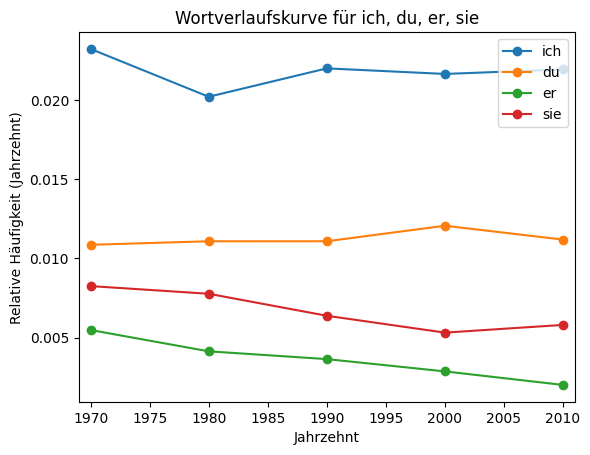

In [35]:
span, span_dict = "Jahrzehnt", {"Jahrzehnt": 10, "Jahrfünft": 5}
words = ["ich", "du", "er", "sie"]

#Ausschluss inkompletter Jahrfünfte bzw. Jahrzehnte durch Kombination zweier Filter
songkorpus = songkorpus[(songkorpus["Jahr"] > 1969) & (songkorpus["Jahr"] < 2020)]

import matplotlib.pyplot as plt

for word in words:
    word_df = songkorpus[songkorpus["Token"] == word]

    """NEUER SCHRITT: AGGREGATION"""
    word_df = word_df.groupby([span]).aggregate({"Relative Häufigkeit": "sum"}) / span_dict[span]
    """NEUER SCHRITT: AGGREGATION"""
    
    
    word_df = word_df.sort_values(by=span, ascending=True).reset_index()
    x = word_df[span]
    y = word_df[f"Relative Häufigkeit"]
    plt.plot(x, y, 'o-')

plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
plt.xlabel(span)
plt.ylabel(f"Relative Häufigkeit ({span})")
plt.xlim(1969, 2011) #Anpassen, je nach Zeitabschnitt
plt.legend(words, loc="best")

Wunderbar. 

Sollte hier neben dem Plot auch eine ```SettingWithCopyWarning``` zurückgegeben worden sein, kannst Du diese ignorieren.

Mit ```plt.savefig(path)``` kannst Du Grafiken übrigens auch auf Deiner Festplatte speichern.

Damit sind wir fast am Ende des Notebooks angelangt.

## Output

Übrig bleibt noch, die Methode ```to_csv``` vorzustellen, die wir verwenden können, um ein DataFrame als kommaseparierte Datei extern zu speichern:

In [36]:
songkorpus.to_csv("../3_Dateien/Output/songkorpus_new.csv", sep="\t", encoding="utf-8")

Neben dem Ausgabepfad können wir das gewünschte Trennzeichen und Encoding spezifizieren. Neben ```to_csv``` gibt es analog zum Input auch spezifische Output-Methoden für XML (```to_xml```), JSON (```to_json```) und Excel (```to_excel```).

Damit sind wir am Ende des zweiteiligen Notebooks angelangt. Gute Arbeit!